In [151]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import transforms
from PIL import Image   

In [152]:
current_directory = os.path.abspath('')

two_folders_up = os.path.abspath(os.path.join(current_directory, '..', '..'))

train_files = os.listdir(os.path.join(two_folders_up, 'datasets/dogs-vs-cats/train/train'))
test_files = os.listdir(os.path.join(two_folders_up, 'datasets/dogs-vs-cats/test1/test1'))

In [153]:
class CatDogDataset(Dataset):
    def __init__(self, file_list, dir, mode='train', transform = None):
        self.file_list = file_list
        self.dir = dir
        self.mode= mode
        self.transform = transform
        if self.mode == 'train':
            if 'dog' in self.file_list[0]:
                self.label = 1
            else:
                self.label = 0
    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.dir, self.file_list[idx]))
        if self.transform:
            img = self.transform(img)
        if self.mode == 'train':
            img = img.numpy()
            return img.astype('float32'), self.label
        else:
            img = img.numpy()
            return img.astype('float32'), self.file_list[idx]

In [154]:
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ColorJitter(),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(128),
    transforms.ToTensor()
])

cat_files = [tf for tf in train_files if 'cat' in tf]
dog_files = [tf for tf in train_files if 'dog' in tf]

path_train = os.path.join(two_folders_up, 'datasets/dogs-vs-cats/train/train')

cats = CatDogDataset(cat_files, path_train, transform = data_transform)
dogs = CatDogDataset(dog_files, path_train, transform = data_transform)

catdogs = ConcatDataset([cats, dogs])

In [155]:
dataloader = DataLoader(catdogs, batch_size = 32, shuffle=True, num_workers=4)

(-0.5, 127.5, 127.5, -0.5)

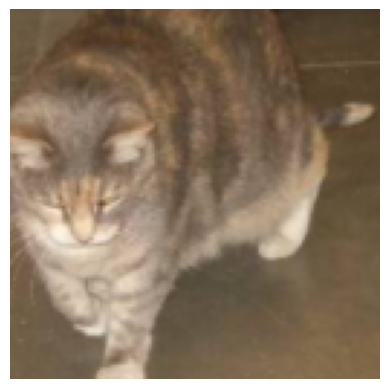

In [156]:
samples, labels = dataloader.dataset.__getitem__(25)
samples_tensor = torch.Tensor(samples)
transposed = np.transpose(samples_tensor,(1,2,0))
plt.imshow(transposed)
plt.axis('off')